In [3]:
import pandas as pd #data processing
import numpy as np #liner algebra
#plot libraries
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# read in csv file as a DataFrame
train=pd.read_csv(r'D:\mini project\train.csv')
# read in csv file as a DataFrame
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#overviewofdataset
train.shape

(8523, 12)

In [5]:
test=pd.read_csv(r'D:\mini project\test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
test.shape

(5681, 11)

In [7]:
# the number of missing values
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#summary statistics of test
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [10]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
#missing values in decsending order
print("Train:\n")
print(train.isnull().sum().sort_values(ascending=False),"\n\n")
print("Test:\n")
print(test.isnull().sum().sort_values(ascending=False),"\n\n")


Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64 




In [12]:
print ("% of missing Values in Train:")
print(train.isnull().sum()/train.shape[0]*100,"\n\n")
print ("% of missing Values in Test:")
print(test.isnull().sum()/test.shape[0] *100,"\n\n")


% of missing Values in Train:
Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


% of missing Values in Test:
Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64 




In [13]:
#print the mode of outlet size in train and test
print("test mode, train mode\n",[test['Outlet_Size'].mode().values[0], train['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


In [14]:
#fill the outlet_size with mode
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].dropna().mode().values[0])
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].dropna().mode().values[0])


In [15]:
#check whether outletsize column has missing value
test['Outlet_Size'].isnull().sum()

0

In [16]:
train['Outlet_Size'].isnull().sum()

0

In [17]:
#fill the item weight with mean

train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].dropna().mean())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].dropna().mean())



In [18]:
test['Item_Weight'].isnull().sum()

0

In [19]:
train['Item_Weight'].isnull().sum()

0

In [20]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [22]:
#count of each unique items from item type column
test['Item_Type'].value_counts()


Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: count, dtype: int64

In [23]:
train['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [24]:
#change the outlet establishment year column to years_established
train['Years_Established']=train['Outlet_Establishment_Year'].apply(lambda x:2013-x)
test['Years_Established']=test['Outlet_Establishment_Year'].apply(lambda x:2013-x)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [25]:
#sstoring the category variables in new df
cat = test.select_dtypes('object')

In [26]:
#storing the numeric variables in new df
numeric = test.select_dtypes('number')

In [27]:
#total categories with frequencies
for col in test.columns:
    if(col != 'Item_Identifier'):
        print('\nFrequency of Categories for varible %s'%col)
        print('\nTotal Categories: ', len(test[col].value_counts()), '\n', test[col].value_counts())
        


Frequency of Categories for varible Item_Weight

Total Categories:  411 
 Item_Weight
12.695633    976
10.500000     57
17.600000     53
15.600000     48
20.250000     47
            ... 
6.980000       1
6.320000       1
5.465000       1
5.945000       1
7.670000       1
Name: count, Length: 411, dtype: int64

Frequency of Categories for varible Item_Fat_Content

Total Categories:  5 
 Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

Frequency of Categories for varible Item_Visibility

Total Categories:  5277 
 Item_Visibility
0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: count, Length: 5277, dtype: int64

Frequency of Categories for varible Item_Type

Total Categories:  16 
 Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Froze

In [28]:
#replacing the values
test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)


In [29]:
test.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

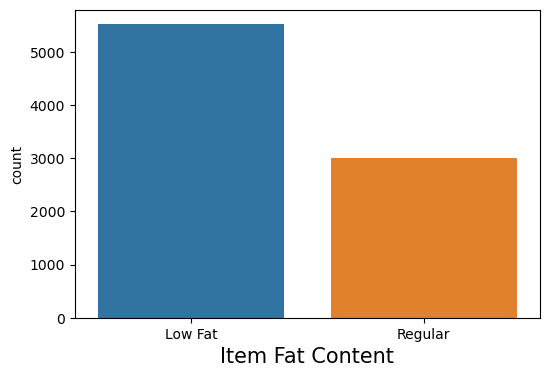

In [30]:
#Univariate Plots category
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Item_Fat_Content')
plt.xlabel('Item Fat Content', fontsize=15)
plt.show()

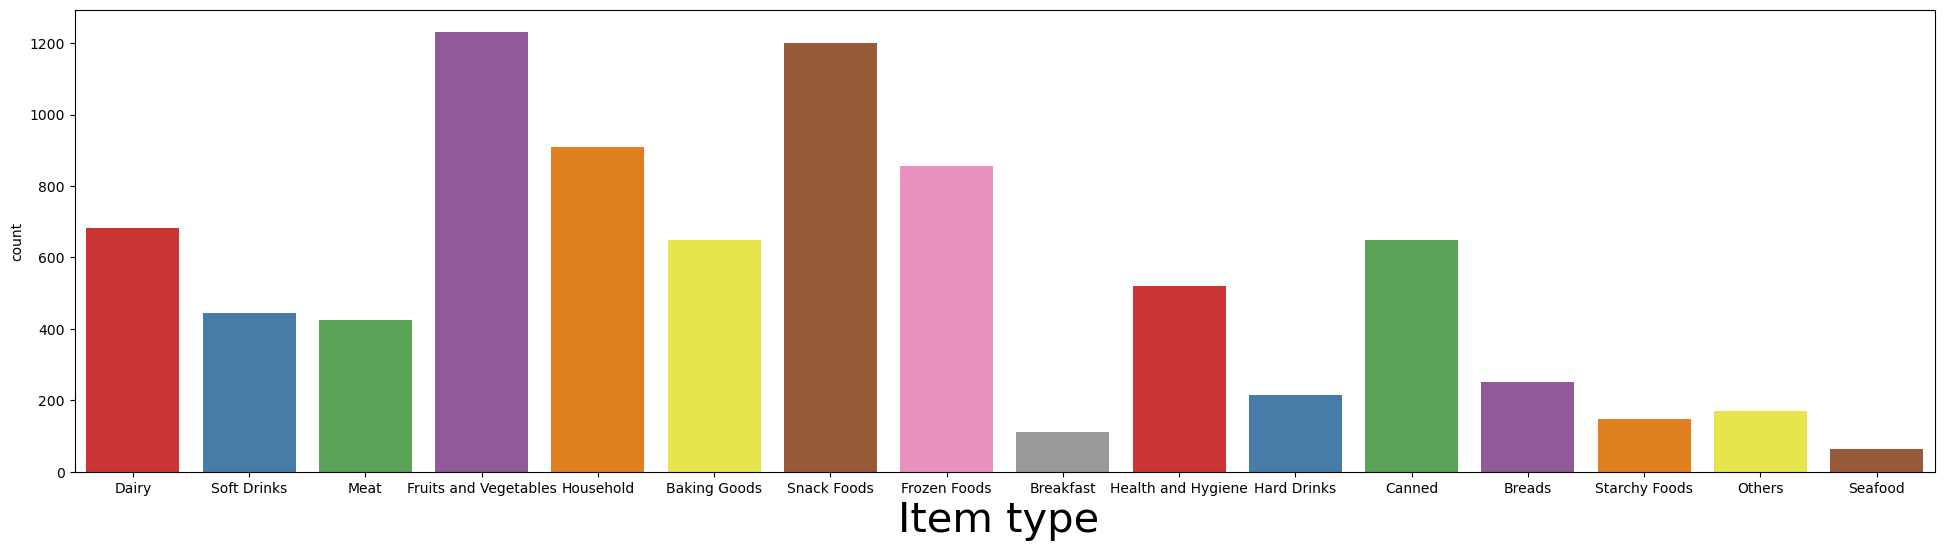

In [31]:
plt.figure(figsize=(24,6))
sns.countplot(data=train, x='Item_Type',  palette='Set1')
plt.xlabel('Item type ', fontsize=30)
plt.show()

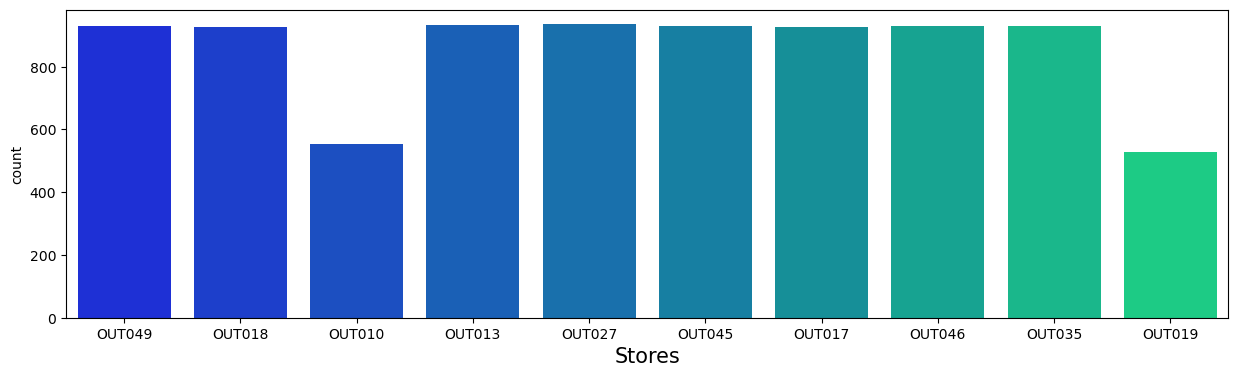

In [32]:
plt.figure(figsize=(15,4))
sns.countplot(data=train, x='Outlet_Identifier', palette='winter')
plt.xlabel('Stores', fontsize=15)
plt.show()

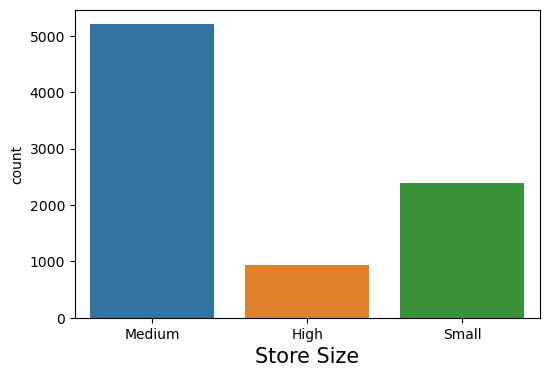

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(data=train, x='Outlet_Size')
plt.xlabel('Store Size', fontsize=15)
plt.show()

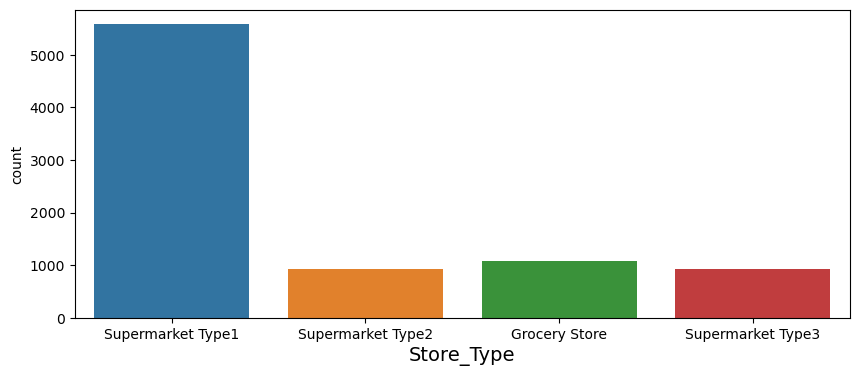

In [34]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=train)
plt.xlabel('Store_Type', fontsize=14)
plt.show()

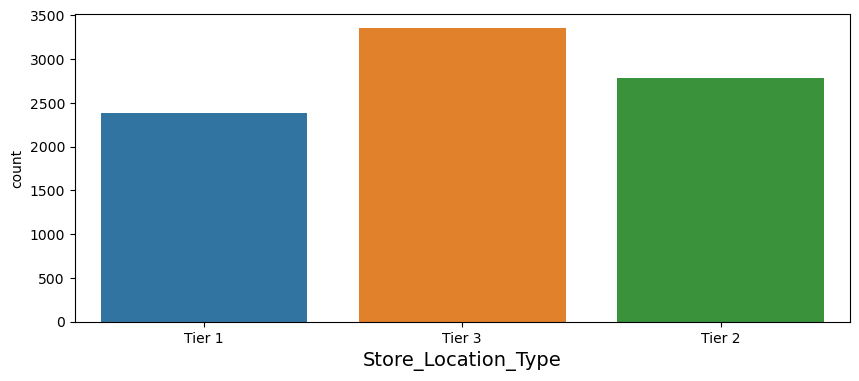

In [35]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=train)
plt.xlabel('Store_Location_Type', fontsize=14)
plt.show()

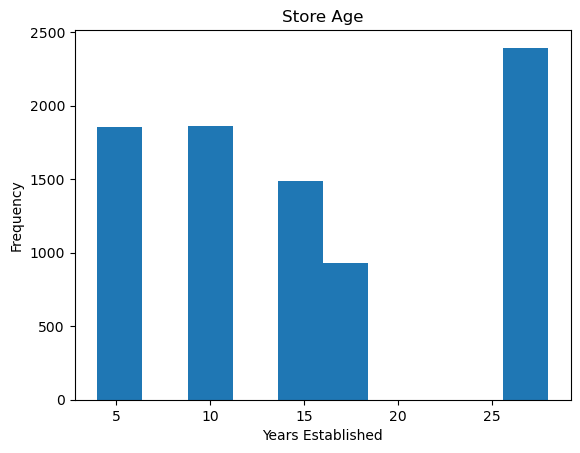

In [49]:
plt.hist(x=train['Years_Established'])
plt.title('Store Age')
plt.xlabel('Years Established')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Bivariate plots For Numeric.
# ScatterPlot for Sales per Item_Visibilty

plt.scatter(train['Item_Visibility'], train['Item_Outlet_Sales'])
plt.title('Sales based on Item Visibilty')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

In [ ]:
# ScatterPlot for Sales per Item_Weight
plt.scatter(train['Item_Weight'], train['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

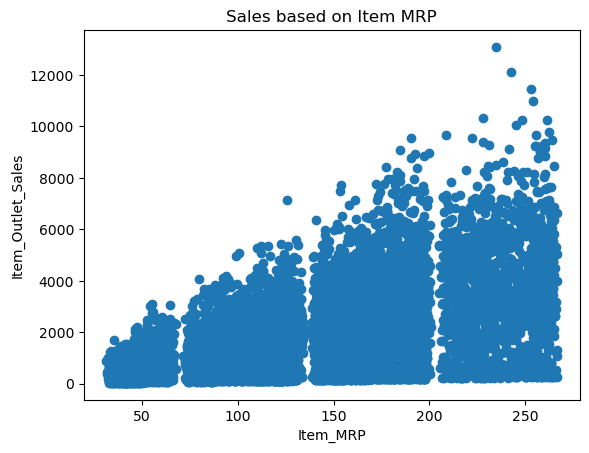

In [37]:
# ScatterPlot for Sales per Item_MRP
plt.scatter(train['Item_MRP'], train['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

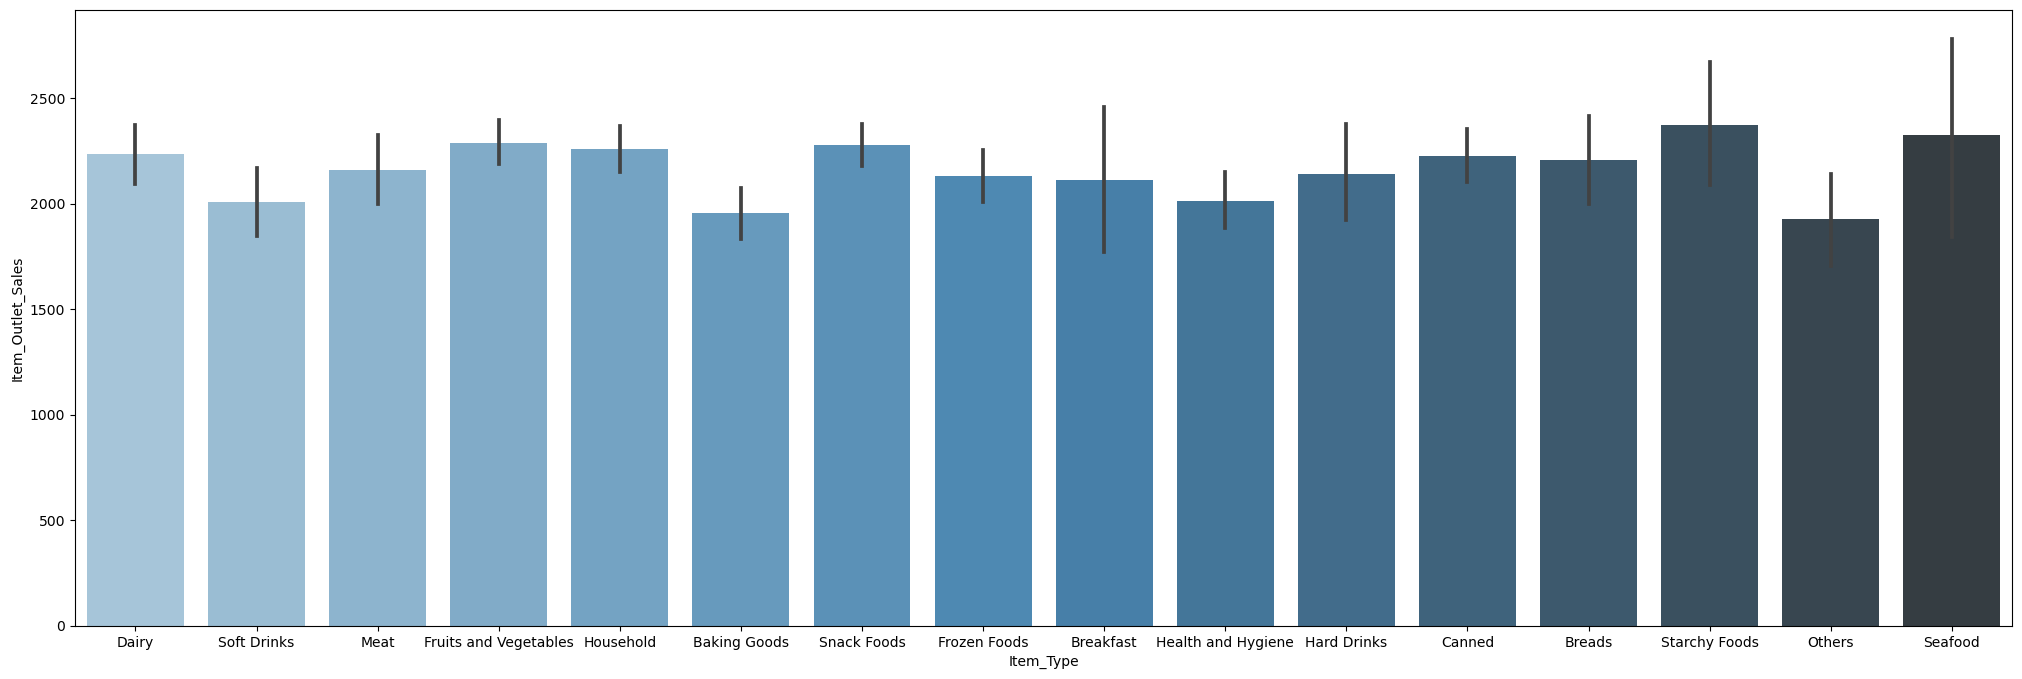

In [38]:
#Bivariate plots For Category
# BarPlot for Sales per Item_Type
plt.figure(figsize = (25,8))
sns.barplot(y="Item_Outlet_Sales", x="Item_Type", data=train,palette="Blues_d")
plt.show()


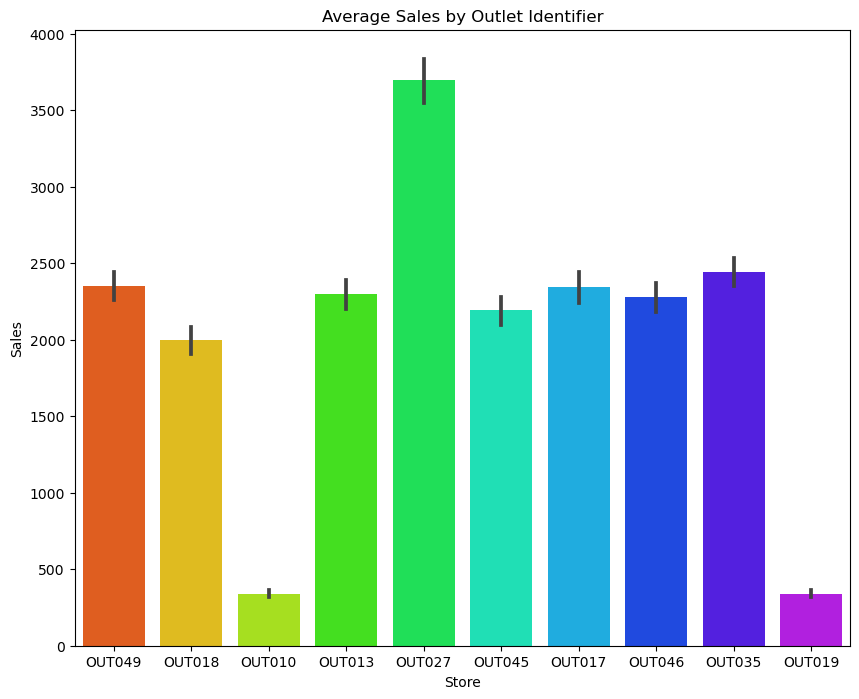

In [39]:
#BarPlot for Sales per Outlet_Identifier
plt.figure(figsize=(10, 8))
sns.barplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train, palette='gist_rainbow')
plt.xlabel('Store') 
plt.ylabel('Sales')  
plt.title('Average Sales by Outlet Identifier')  
plt.show()

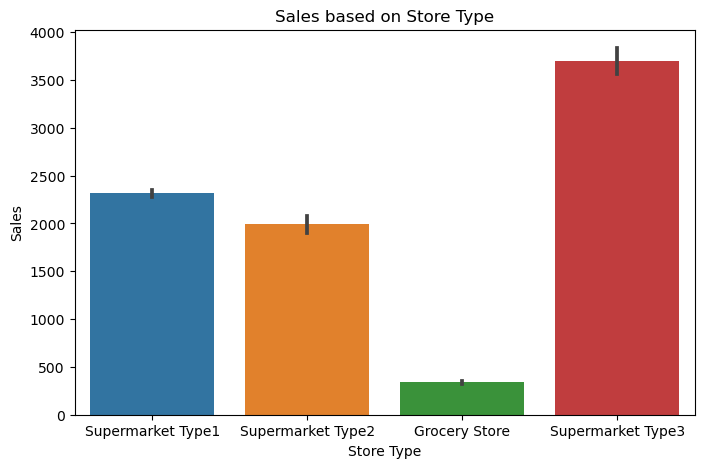

In [40]:
# BarPlot for Sales per Outlet_Type
plt.figure(figsize=(8,5))
sns.barplot(data=train,x='Outlet_Type', y='Item_Outlet_Sales')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.title('Sales based on Store Type')
plt.show()

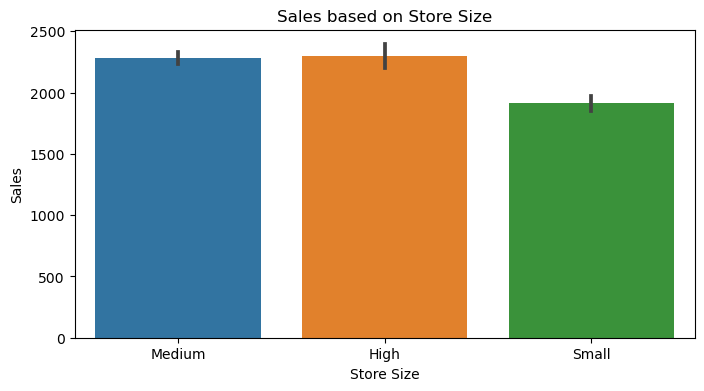

In [41]:
# BarPlot for Sales per store_Size
plt.figure(figsize=(8,4))
sns.barplot(data=train,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.show()


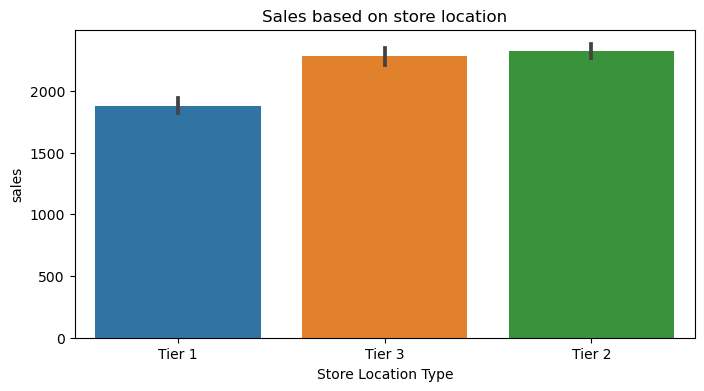

In [42]:
# BarPlot for Sales per store_location_type
plt.figure(figsize=(8,4))
sns.barplot(data=train,x='Outlet_Location_Type',y='Item_Outlet_Sales')
plt.title('Sales based on store location')
plt.xlabel('Store Location Type')
plt.ylabel('sales')
plt.show()


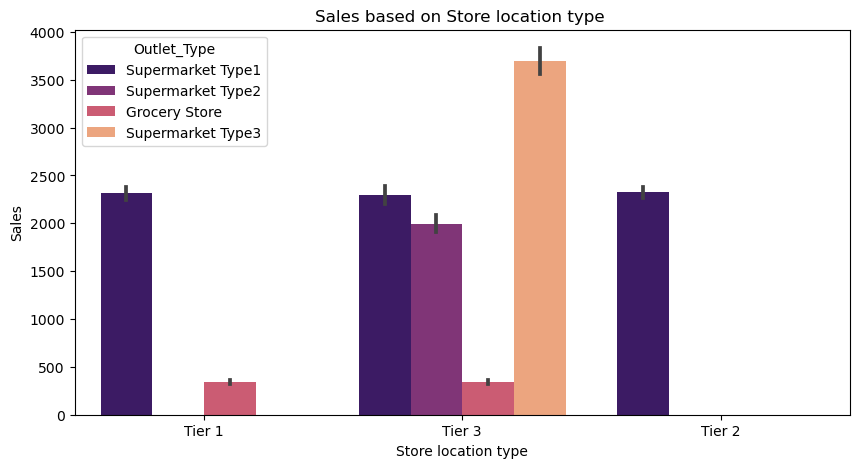

In [43]:
#multivariable plots
#Outlet Type in all Outlet location based on sales.

plt.figure(figsize=(10,5))
sns.barplot(data=train,x='Outlet_Location_Type', y='Item_Outlet_Sales',hue='Outlet_Type',palette='magma')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.title('Sales based on Store location type ')
plt.show()

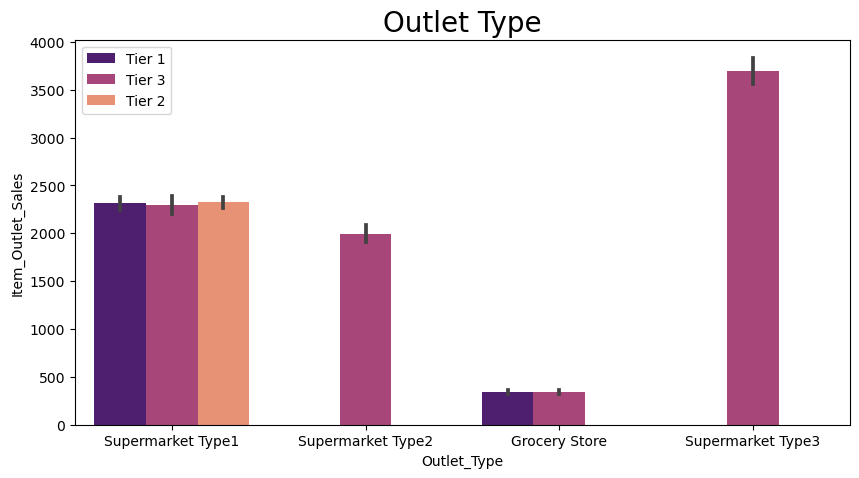

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Location_Type',data=train,palette='magma')
plt.title('Outlet Type', fontsize=20)
plt.legend()
plt.show()

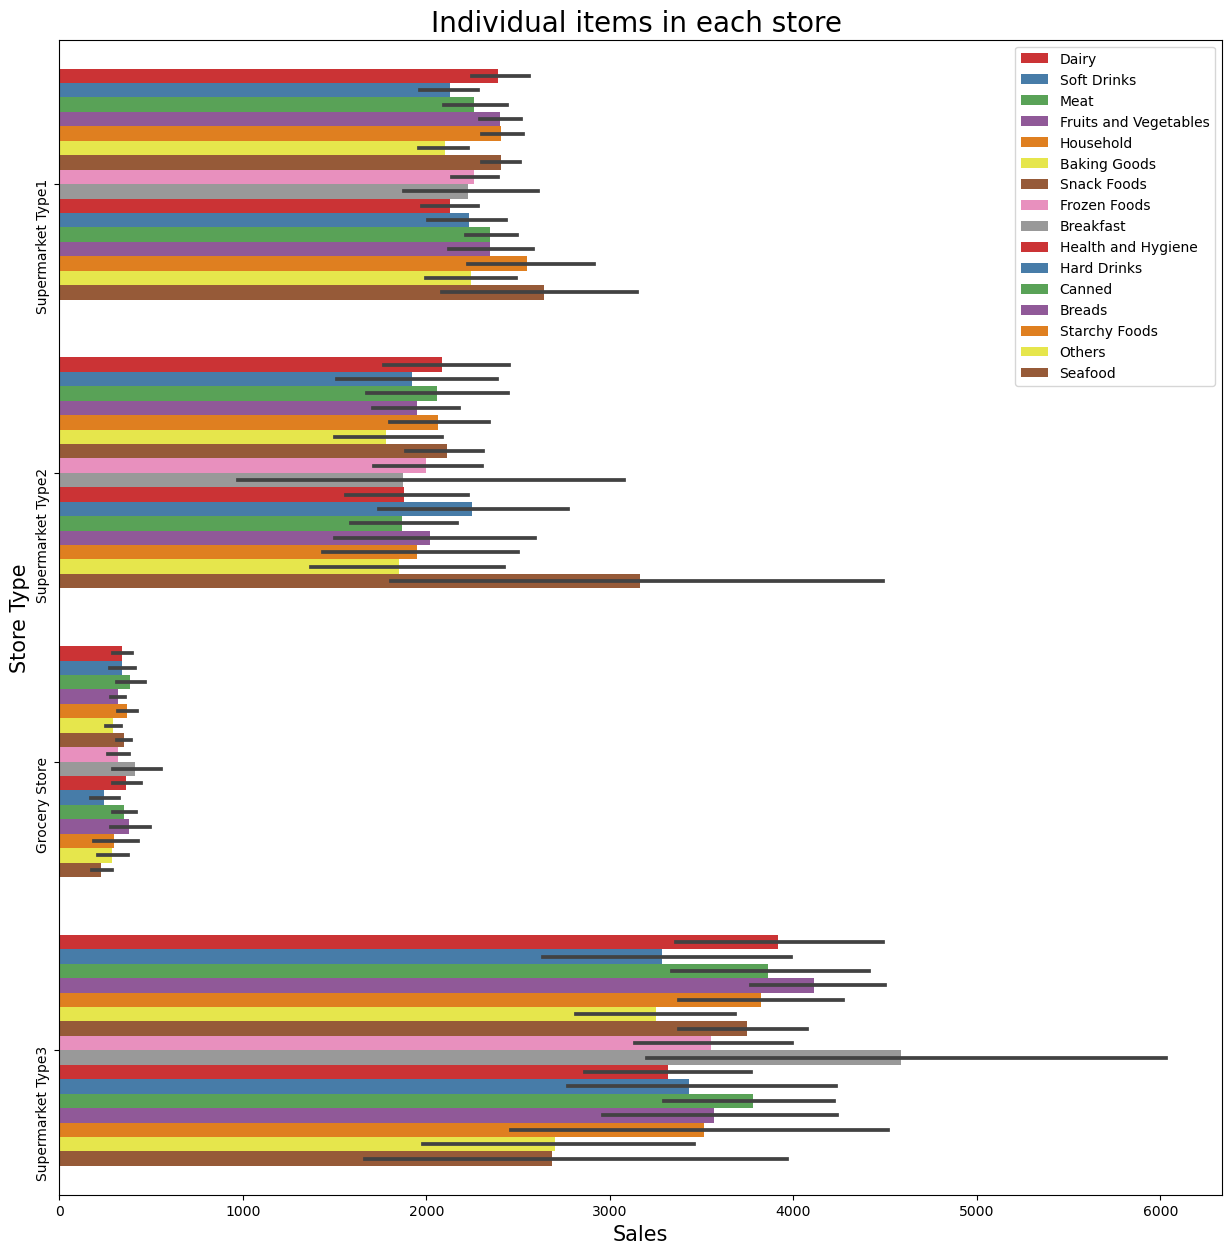

In [45]:
#Sales of Item_Type based on Outlet_Type.
plt.figure(figsize=(15,15))
sns.barplot(data=train,x='Item_Outlet_Sales', y='Outlet_Type',hue='Item_Type',palette='Set1')
plt.title('Individual items in each store ', fontsize=20)
plt.xlabel('Sales', fontsize=15)
plt.ylabel('Store Type', fontsize=15)
plt.yticks(rotation=90)
plt.legend()
plt.show()

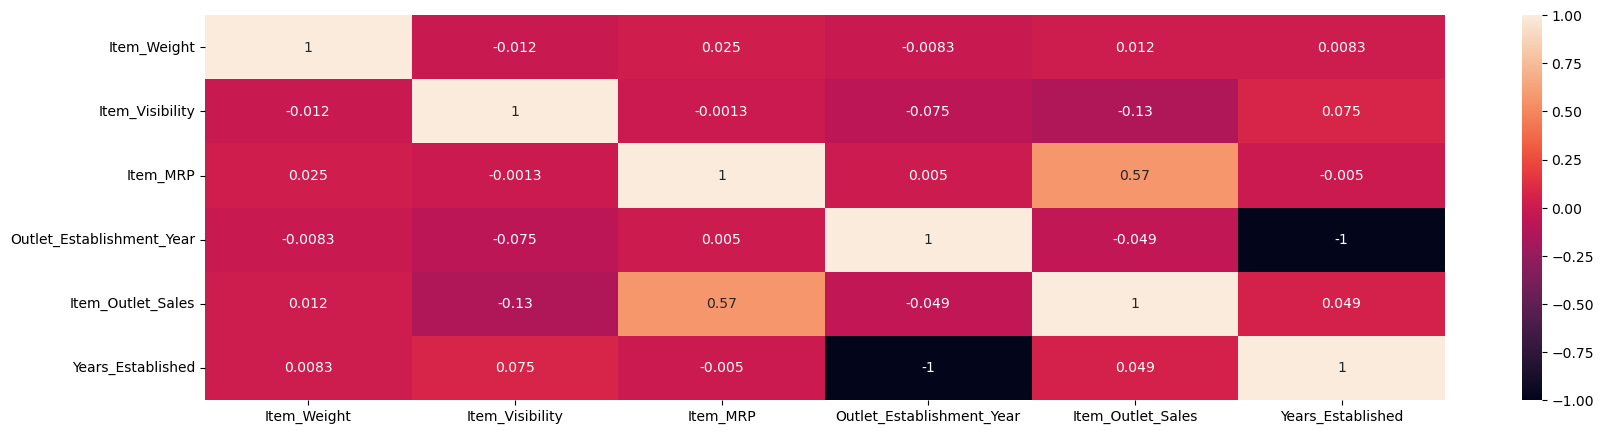

In [46]:
# Correlation Matrix
# Exclude non-numeric columns
numeric_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Create the correlation matrix
corr_matrix = train[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(20, 5))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [47]:
cat.apply(lambda x: x.nunique()) 


Item_Identifier         1543
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [48]:
#Label Encoding for Ordinal Data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = ['Item_Fat_Content','Outlet_Location_Type', 'Outlet_Size']
for i in label:
    train[i] = le.fit_transform(train[i])
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,14
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,4
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,14
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,15
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,26


In [ ]:
#hotencoding
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Columns to one-hot encode
cols_to_encode = ['Item_Type', 'Outlet_Type']

# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the training data
train_oh = pd.DataFrame(OH_encoder.fit_transform(train[cols_to_encode]), columns=OH_encoder.get_feature_names_out(cols_to_encode)).astype('int64')

# Transform the test data
test_oh = pd.DataFrame(OH_encoder.transform(test[cols_to_encode]), columns=OH_encoder.get_feature_names_out(cols_to_encode)).astype('int64')

# Concatenate one-hot encoded columns to the original DataFrames
train_fe = pd.concat([train, train_oh], axis=1)
test_fe = pd.concat([test, test_oh], axis=1)

In [200]:
print(train_fe.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_Established',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')


In [201]:
train_fe  = train_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [202]:
test_fe  = test_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [203]:
train_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Years_Established,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,14,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,4,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,14,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,15,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,26,0,0,...,0,0,0,0,0,0,0,1,0,0
